## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

In [105]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [106]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [107]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [108]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [110]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод**

1. По форматированию данных:
- Year_of_Release перевести в int
- User_Score перевести во float
2. Пустые значения. Проверить столбцы:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score
- Rating

## Подготовка данных

### Заменим названия столбцов (приведем к нижнему регистру)

In [111]:
data.columns = [x.lower() for x in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы.

In [112]:
data['year_of_release']=data['year_of_release'].astype('Int64')

user_score переведем во float после того, как уберем текстовые значения из стобца

### Обработаем пропуски

#### Колонка name

In [113]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [114]:
data = data.dropna(subset = ['name']).reset_index(drop=True)

Удалили записи, потому что в них практически нет данных

#### Колонка year_of_release

In [115]:
data[data['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Оставим пока пропуски

#### Колонка critic_score       

In [116]:
data[data['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [117]:
data.query('(critic_score.isnull()) and (user_score.isnull()) and (rating.isnull())')['name'].count()

6619

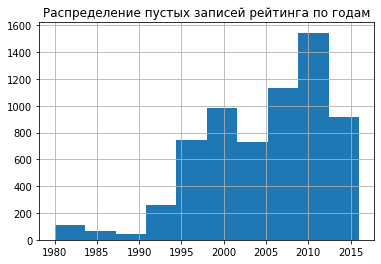

In [118]:
plt.title('Распределение пустых записей рейтинга по годам')
data.query('(critic_score.isnull()) and (user_score.isnull()) and (rating.isnull())')['year_of_release'].hist()

Если рейтинг отсутствует, то чаще всего в записи отсутвуют все три рейтинга critic_score, user_score, rating. Объем таких записей значителен, поэтому удалить не можем. Оставим пропуски.

#### Разберем наличие 'tbd' в столбцах с рейтингом

In [119]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


"tbd" переводится как "будет определено позднее". Для анализа оно ничем не отличается от NaN. Переведем "tbd" в NaN.

In [120]:
data['user_score'].loc[data['user_score'] == 'tbd'] = np.NaN
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [121]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [122]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [123]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Анализ данных

### Посмотрим сколько игр выпускалось в разные годы

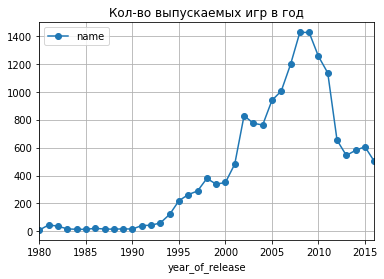

In [124]:
data.pivot_table(values = 'name', index = 'year_of_release', aggfunc = 'count').plot(title = 'Кол-во выпускаемых игр в год',grid = True,style = '-o')

Судя по количеству выпущенных игр хвост до 2000 года можно откинуть. Период с 2000г. будем считать **актуальным периодом**

In [125]:
good_data=data.query('year_of_release >= 2000')

### Посмотрим как менялись продажи по платформам. 

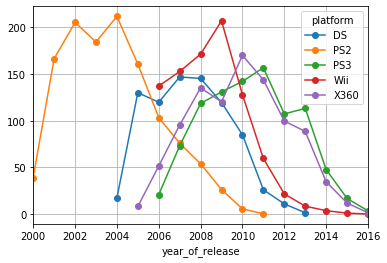

In [126]:
df_top_platform = good_data.pivot_table(
    values = 'total_sales', 
    index = 'platform', 
    aggfunc = 'sum').sort_values(
        by='total_sales',
        ascending = False).head()
good_data.query(
    '(platform in @df_top_platform.index)and(year_of_release >= 2000)').pivot_table(
        values = 'total_sales', 
        index = 'year_of_release',
        columns = 'platform', 
        aggfunc = 'sum').plot( 
            grid = True,
            style = '-o')

Выведем график по каждой платформе отдельно </div>

In [127]:
df_platform_top5 = good_data.query(
    '(platform in @df_top_platform.index)and(year_of_release >= 2000)').pivot_table(
        values = 'total_sales', 
        index = 'year_of_release', 
        columns = 'platform', 
        aggfunc = 'sum')
df_platform_top5.reset_index(inplace=True)

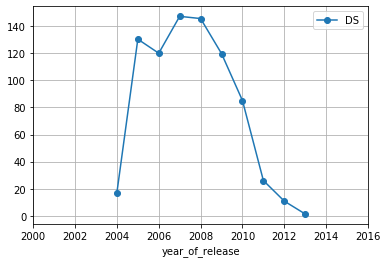

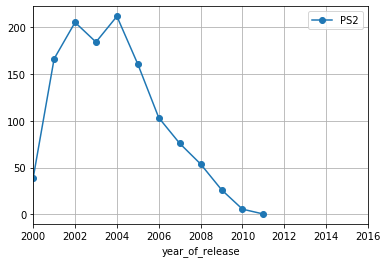

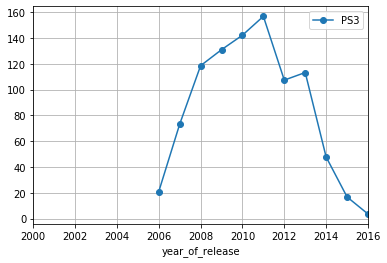

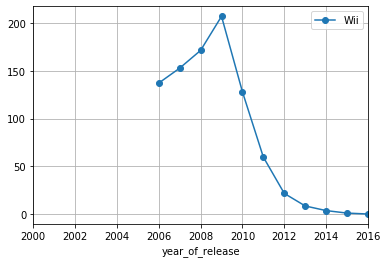

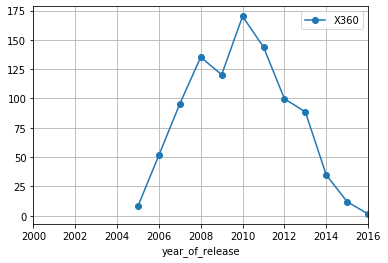

In [128]:
for i in range(1,6):
    df_platform_top5.loc[:,['year_of_release',df_platform_top5.columns[i]]].plot( x='year_of_release',y=df_platform_top5.columns[i],
            grid = True,
            style = '-o')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd762298dd0>,
      dtype=object)

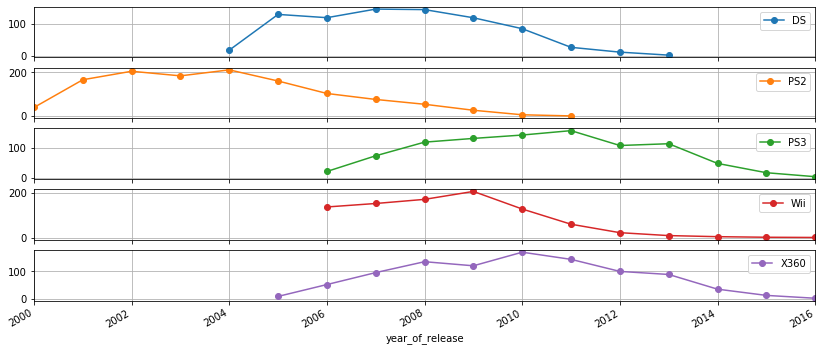

In [129]:
good_data.query(
    '(platform in @df_top_platform.index)and(year_of_release >= 2000)').pivot_table(
        values = 'total_sales', 
        index = 'year_of_release',
        columns = 'platform', 
        aggfunc = 'sum').plot( 
            grid = True,
            style = '-o',
            subplots=True,
            figsize=(14,6)
)

### Посчитаем сколько в среднем существует платформа из топ 5 по продажам

In [130]:
good_data.query(
    '(platform in @df_top_platform.index)and(year_of_release >= 2000)').groupby([
        'platform','year_of_release']).agg({'total_sales':'count'}).reset_index().groupby(
            'platform').agg({'year_of_release':'count'}).mean()

year_of_release    11.2
dtype: float64

Если смотреть на уровень продаж более 100 млн (будем считать это уровнем выхода в топ), то продажи игр для новой платформы держатся в среднем 5 лет. В целом среднее общее время существования платформы порядка 11 лет.

### Найдем потенциально прибыльные платформы

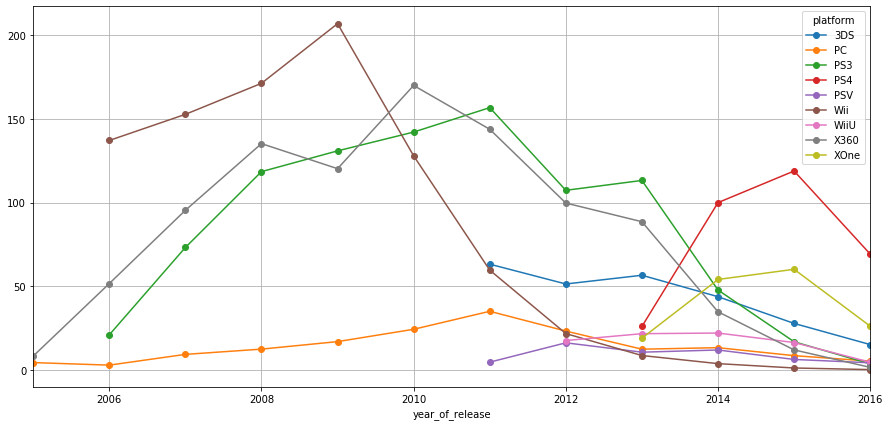

In [131]:
# Посмотрим какие платформы были по состоянию на 2016г. 
#Будем смотреть период с 2005 года (2016г. минус 11 лет (среднее время существование платформы))
df_platform_2016 = good_data[good_data['year_of_release'] == 2016].groupby('platform').agg({'total_sales':'sum'})
good_data.query(
    '(platform in @df_platform_2016.index)and(year_of_release >= 2005)').pivot_table(
        values = 'total_sales', 
        index = 'year_of_release', 
        columns = 'platform', 
        aggfunc = 'sum').plot( 
            grid = True,
            style = '-o', figsize = (15,7))

**Вывод**

В 2016 году снизились продажи во всем платформам. Здесь не хватает информации, либо это действительно отражает ситуацию на рынке, либо данные за 2016г еще не полностью актуализированы. 

В целом стадия роста за предыдущие годы наблюдается только по двум платформам: PS4 и xOne. Они на рынке только 4 года, поэтому их можно рассматривать как потенциально прибыльные. 

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

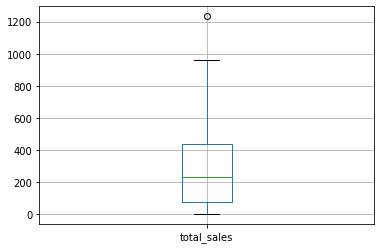

In [132]:
good_data.groupby('platform').agg({'total_sales':'sum'}).boxplot()

**Вывод**
Выбросов практически нет. Верхний ус чуть менее 1000.

In [133]:
list_platform = good_data.groupby('platform').agg({'total_sales':'sum'}).reset_index()['platform']

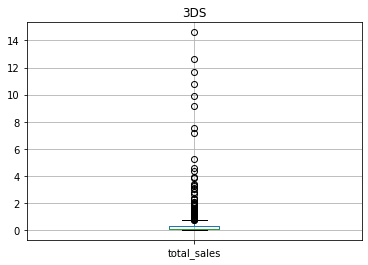

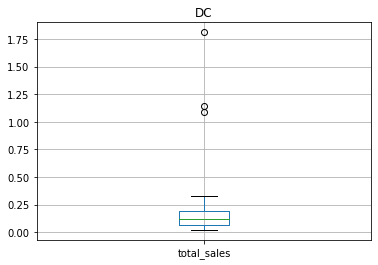

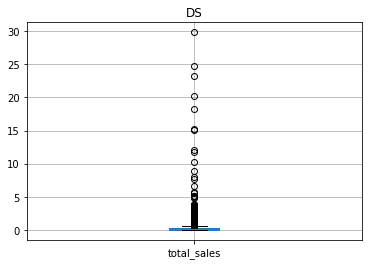

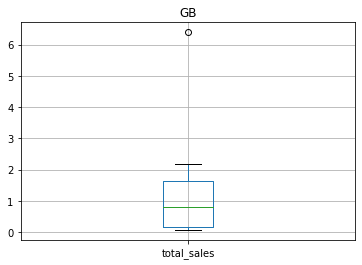

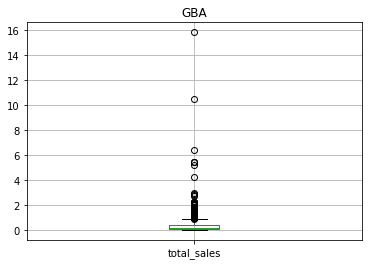

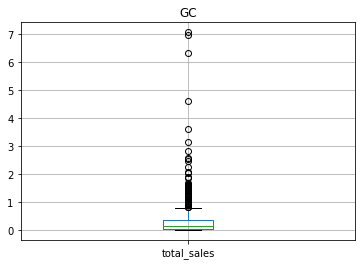

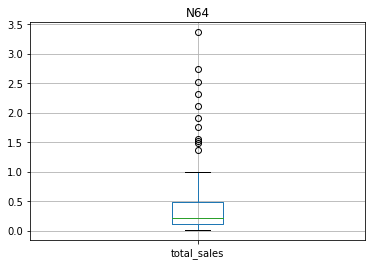

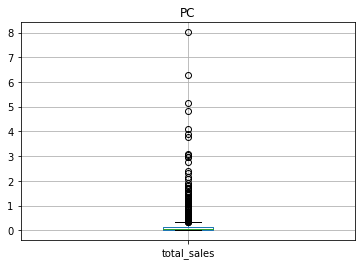

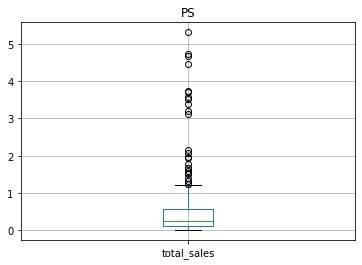

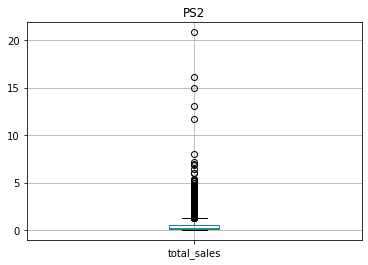

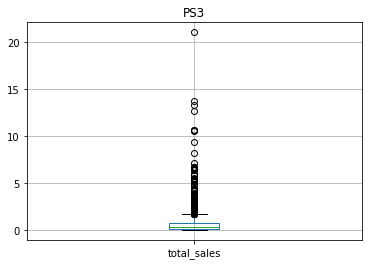

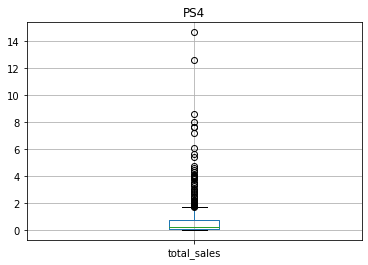

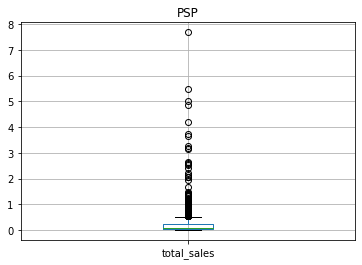

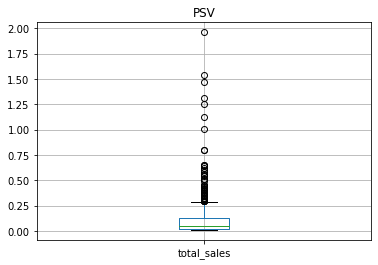

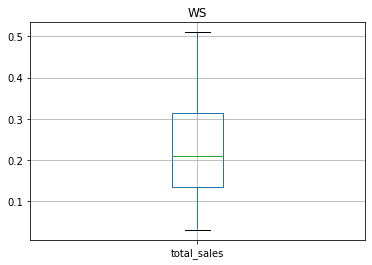

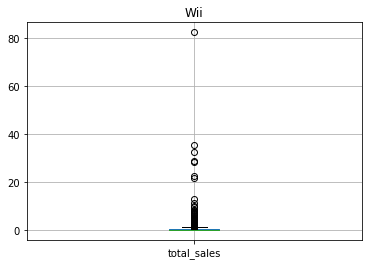

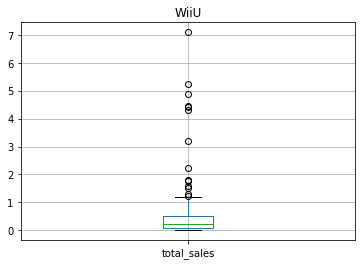

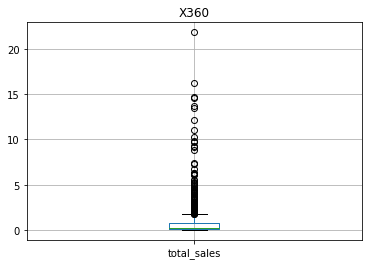

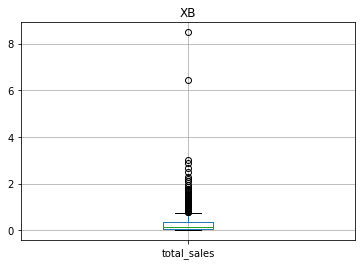

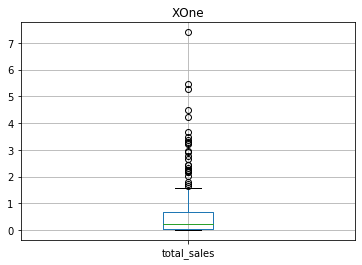

In [134]:
for i in range(len(list_platform)):
    plt.title(list_platform[i])
    good_data[good_data['platform'] == list_platform[i]].boxplot(column = 'total_sales')
    plt.show()

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [135]:
#найдем платформу с максимальным количеством продаж
good_data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).head(1)

,total_sales
platform,
PS2,1233.56


In [136]:
df_platform_PS2 = good_data.query('platform == "PS2" ')

#### Посмотрим как влияют отзывы критиков

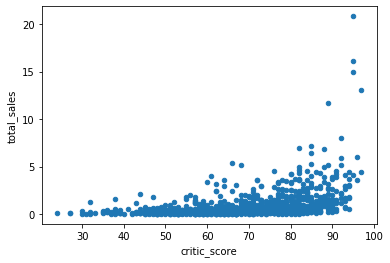

In [137]:
df_platform_PS2.plot(y='total_sales', x='critic_score', kind = 'scatter')

In [138]:
df_platform_PS2['total_sales'].corr(df_platform_PS2['critic_score'])

0.39253647544509

**Вывод**

Корреляция 0.39 говорит о наличии связи, однако не слишком сильной.

#### Посмотрим как влияют отзывы пользователей

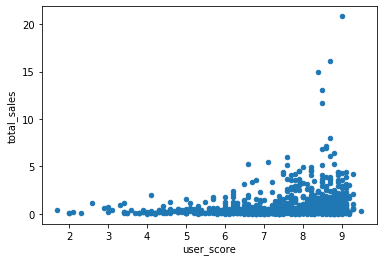

In [139]:
df_platform_PS2.plot(y='total_sales', x='user_score', kind = 'scatter')

In [140]:
df_platform_PS2['total_sales'].corr(df_platform_PS2['user_score'])

0.1750550277038374

**Вывод**

Связь между продажами и отзывами пользователей еще слабее, чем между продажами и отзывами критиков.

### Соотнесем выводы с продажами игр на других платформах

#### Посчитаем корреляцию для остальных платформ

In [141]:
df_platform = good_data.groupby('platform').agg({'total_sales':'sum'}).reset_index()
df_platform['corr_critic_score'] = None
df_platform['corr_user_score'] = None
for platform in df_platform['platform']:
    x = good_data[good_data['platform'] == platform]
    df_platform.loc[df_platform['platform'] == platform, 'corr_critic_score']= x['total_sales'].corr(x['critic_score'])
    df_platform.loc[df_platform['platform'] == platform, 'corr_user_score']= x['total_sales'].corr(x['user_score'])
df_platform.sort_values(by='total_sales', ascending = False, inplace = True)

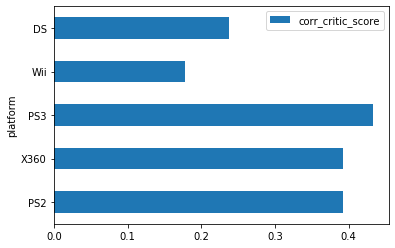

In [142]:
df_platform.head().plot(x='platform',y='corr_critic_score', kind = 'barh')

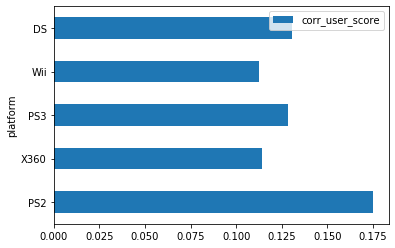

In [143]:
df_platform.head().plot(x='platform',y='corr_user_score', kind = 'barh')

**Вывод**
На других платформах значительно большая корреляция не обранаружена

### Посмотрим на общее распределение игр по жанрам.

In [144]:
good_data.groupby(by = ['genre','year_of_release']).agg({'total_sales':'sum'}).groupby('genre').agg({'total_sales':['sum','mean']}).sort_values(by=('total_sales','sum'),ascending=False)

total_sales           
                     sum       mean
genre                              
Action           1526.16  89.774118
Sports           1130.92  66.524706
Shooter           912.70  53.688235
Role-Playing      731.22  43.012941
Misc              718.35  42.255882
Racing            561.06  33.003529
Platform          494.42  29.083529
Simulation        335.41  19.730000
Fighting          311.90  18.347059
Adventure         183.74  10.808235
Puzzle            138.20   8.129412
Strategy          115.07   6.768824

**Вывод:**
Топ-3 жанров по продажам: Action, Sports, Shooter
Хуже всего продаются жанры Adventure, Puzzle, Strategy.

In [145]:
good_data.groupby('genre').agg({'total_sales':['sum','mean']}).sort_values(by=('total_sales','mean'),ascending=False)

total_sales          
                     sum      mean
genre                             
Shooter           912.70  0.808415
Platform          494.42  0.686694
Sports           1130.92  0.571460
Role-Playing      731.22  0.562477
Racing            561.06  0.542087
Action           1526.16  0.495667
Fighting          311.90  0.487344
Misc              718.35  0.449812
Simulation        335.41  0.436732
Puzzle            138.20  0.288518
Strategy          115.07  0.209218
Adventure         183.74  0.153886

## Составляем портрет пользователя

### Самые популярные платформы (топ-5)

#### Северная Америка

In [146]:
df_patform_na_sales = good_data.groupby('platform').agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales',ascending=False)
df_patform_na_sales['ratio_sales'] = df_patform_na_sales['na_sales']/df_patform_na_sales['na_sales'].sum()
df_patform_na_sales.head()

,platform,na_sales,ratio_sales
17,X360,595.74,0.168784
9,PS2,572.92,0.162318
15,Wii,486.87,0.137939
10,PS3,390.13,0.110531
2,DS,380.31,0.107748


По доле продажи лидируют X360 и PS2

#### Европа

In [147]:
df_patform_eu_sales = good_data.groupby('platform').agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales',ascending=False)
df_patform_eu_sales['ratio_sales'] = df_patform_eu_sales['eu_sales']/df_patform_eu_sales['eu_sales'].sum()
df_patform_eu_sales.head()

,platform,eu_sales,ratio_sales
9,PS2,332.63,0.159488
10,PS3,327.21,0.156889
17,X360,268.32,0.128653
15,Wii,258.32,0.123858
2,DS,188.41,0.090338


В Европе по доле продаж лидирут PS2 и PS3

#### Япония

In [148]:
df_patform_jp_sales = good_data.groupby('platform').agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales',ascending=False)
df_patform_jp_sales['ratio_sales'] = df_patform_jp_sales['jp_sales']/df_patform_jp_sales['jp_sales'].sum()
df_patform_jp_sales.head()

,platform,jp_sales,ratio_sales
2,DS,175.00,0.214508
9,PS2,137.54,0.168591
0,3DS,100.62,0.123336
10,PS3,79.41,0.097338
12,PSP,75.88,0.093011


В Японии в лидерах DS от компании Nintendo. Nintendo - японская компания, поэтому лидерство здесь вполне объяснимо.

### Самые популярные жанры (топ-5).

#### Северная Америка

In [149]:
df_genre_na_sales = good_data.groupby('genre').agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales',ascending=False)
df_genre_na_sales['ratio_sales'] = df_genre_na_sales['na_sales']/df_genre_na_sales['na_sales'].sum()
df_genre_na_sales.head(5)

,genre,na_sales,ratio_sales
0,Action,752.27,0.213131
10,Sports,589.39,0.166984
8,Shooter,495.23,0.140307
3,Misc,365.27,0.103487
7,Role-Playing,282.30,0.079981


С большим отрывом лидирует Action

#### Европа

In [150]:
df_genre_eu_sales = good_data.groupby('genre').agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales',ascending=False)
df_genre_eu_sales['ratio_sales'] = df_genre_eu_sales['eu_sales']/df_genre_eu_sales['eu_sales'].sum()
df_genre_eu_sales.head()

,genre,eu_sales,ratio_sales
0,Action,466.58,0.223714
10,Sports,339.58,0.162820
8,Shooter,294.02,0.140976
3,Misc,196.71,0.094318
6,Racing,192.02,0.092069


Отрыв опять у Action. Топ-4 такой же как у Северной Америки.

#### Япония

In [151]:
df_genre_jp_sales = good_data.groupby('genre').agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales',ascending=False)
df_genre_jp_sales['ratio_sales'] = df_genre_jp_sales['jp_sales']/df_genre_jp_sales['jp_sales'].sum()
df_genre_jp_sales.head()

,genre,jp_sales,ratio_sales
7,Role-Playing,241.71,0.296279
0,Action,132.23,0.162082
3,Misc,85.43,0.104717
10,Sports,75.88,0.093011
4,Platform,55.27,0.067748


Здесь на первом месте жанр Role-Playing. Предполагаю, что это специфика японской культуры.

### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [152]:
df_rating = good_data.groupby('rating').agg({'jp_sales':'sum','eu_sales':'sum','na_sales':'sum' }).reset_index()
df_rating['jp_ratio_sales'] = df_rating['jp_sales']/df_rating['jp_sales'].sum()
df_rating['eu_ratio_sales'] = df_rating['eu_sales']/df_rating['eu_sales'].sum()
df_rating['na_ratio_sales'] = df_rating['na_sales']/df_rating['na_sales'].sum()
df_rating.sort_values(by='jp_ratio_sales',inplace = True, ascending= False)
df_rating[['rating','jp_ratio_sales','eu_ratio_sales','na_ratio_sales']]

,rating,jp_ratio_sales,eu_ratio_sales,na_ratio_sales
1,E,0.453289,0.396948,0.411589
6,T,0.312703,0.225721,0.233875
4,M,0.138056,0.271525,0.239786
2,E10+,0.095952,0.105374,0.113831
0,AO,0.000000,0.000351,0.000415
3,EC,0.000000,0.000063,0.000504
5,RP,0.000000,0.000017,0.000000


**Вывод**

Рейтинг ESRB влияет на продажи в отдельном регионе.

Во всех трех регионах лидирует продажи игр с рейтингом E. Второе и третье место в разном порядке в зависимости от региона делят игр с рейтингом T и М. На четвертом месте во всех регионах игры с рейтингом Е10+. Продажи игр с другим рейтингом незначительны.


## Проверка гипотез

### Проверим гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые

Сформируем гипотезы:

Но - что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1 - что средние пользовательские рейтинги платформ Xbox One и PC различаются

In [153]:
alpha = 0.05
df_platform_xone = good_data[good_data['platform'] == 'XOne']
df_platform_pc = good_data[good_data['platform'] == 'PC']

#удалим пропуски, чтобы ttest_ind смог сверить датасеты
df_platform_xone['user_score'].dropna(inplace = True)
df_platform_pc['user_score'].dropna(inplace = True)

results = st.ttest_ind(df_platform_xone['user_score'], df_platform_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.750185722417337e-05
Отвергаем нулевую гипотезу


**Отвергнута** гипотеза о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые

Посмотрим нормальное ли распределение у выборок </div>

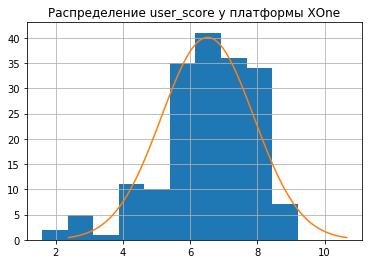

In [154]:
plt.title('Распределение user_score у платформы XOne')

num_bins = 10
N =  df_platform_xone['user_score'].count()
mu = df_platform_xone['user_score'].mean()
variance = np.var(df_platform_xone['user_score'])
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
bin_width = (df_platform_xone['user_score'].max() - df_platform_xone['user_score'].min()) / num_bins

df_platform_xone['user_score'].hist(bins = num_bins)
plt.plot(x, st.norm.pdf(x, mu, sigma)*N*bin_width)

plt.show()

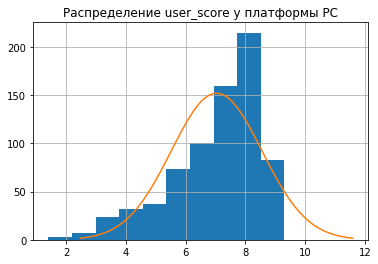

In [155]:
plt.title('Распределение user_score у платформы PC')

num_bins = 10
N =  df_platform_pc['user_score'].count()
mu = df_platform_pc['user_score'].mean()
variance = np.var(df_platform_pc['user_score'])
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
bin_width = (df_platform_pc['user_score'].max() - df_platform_pc['user_score'].min()) / num_bins

df_platform_pc['user_score'].hist(bins = num_bins)
plt.plot(x, st.norm.pdf(x, mu, sigma)*N*bin_width)

plt.show()

Выборки выходят за диапазон нормального распределения, но в целом близки к нему.

### Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем гипотезы:

Но - что средние пользовательские рейтинги жанров Action и Sports одинаковые

Н1 - что средние пользовательские рейтинги жанров Action и Sports различаются

In [156]:
alpha = 0.05
df_genre_action = good_data[good_data['genre'] == 'Action']
df_genre_sports = good_data[good_data['genre'] == 'Sports']

#удалим пропуски, чтобы ttest_ind смог сверить датасеты
df_genre_action['user_score'].dropna(inplace = True)
df_genre_sports['user_score'].dropna(inplace = True)

results = st.ttest_ind(df_genre_action['user_score'], df_genre_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09063548503578989
Не получилось отвергнуть нулевую гипотезу


**Отвергнута** гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

1. Потенциально прибыльными платформами выбраны PS4 и xOne.
2. Больше всего продаются игры с рейтингом E.
3. Корреляция между рейтингом (пользователей и критиков) и продажами игр есть, но слабая.
4. Лучше всего продаются игры в жанрах:
  - Action,Sports,Shooter в Европе и Северной Америке
  - Role-Playing, Action,Misc в Японии.
5. Самые большие продажи игр у жанров Action, Sports, Shooter, Role-Playing, Misc
6. Отвергнуты гипотезы:
  - о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые
  - о том, что средние пользовательские рейтинги жанров Action и Sports разные